['test', 'train']
Found 739 images belonging to 2 classes.
Found 478 images belonging to 2 classes.
Epoch 1/15
12/12 [==============================] - 72s 6s/step - loss: 0.5595 - accuracy: 0.8099 - val_loss: 0.8543 - val_accuracy: 0.4563

Epoch 00001: val_accuracy improved from -inf to 0.45625, saving model to best_model.hdf5
Epoch 2/15
12/12 [==============================] - 49s 4s/step - loss: 0.4854 - accuracy: 0.8125 - val_loss: 0.9029 - val_accuracy: 0.4437

Epoch 00002: val_accuracy did not improve from 0.45625
Epoch 3/15
12/12 [==============================] - 49s 4s/step - loss: 0.4380 - accuracy: 0.8411 - val_loss: 1.2227 - val_accuracy: 0.4375

Epoch 00003: val_accuracy did not improve from 0.45625
Epoch 4/15
12/12 [==============================] - 48s 4s/step - loss: 0.4352 - accuracy: 0.8438 - val_loss: 1.4763 - val_accuracy: 0.4688

Epoch 00004: val_accuracy improved from 0.45625 to 0.46875, saving model to best_model.hdf5
Epoch 5/15
12/12 [===========================

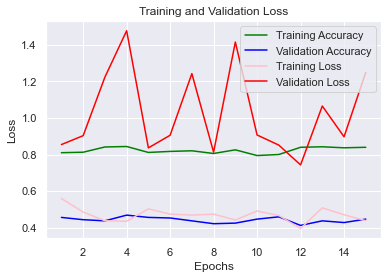

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from PIL import Image
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

# Input data files are available in the "C:\Users\Sadupama\Desktop\model" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir(r"C:\Users\Sadupama\Desktop\P\test"))

# Any results you write to the current directory are saved as output.
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third convolutional layer
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a fourth convolutional layer
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train = train_datagen.flow_from_directory(r'C:\Users\Sadupama\Desktop\P\test\train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test = test_datagen.flow_from_directory(r'C:\Users\Sadupama\Desktop\P\test\test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')
filepath = "best_model.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
history = classifier.fit(train,
                         steps_per_epoch = 12,
                         epochs = 15,
                         validation_data = test,
                         validation_steps = 10,
                         callbacks = [checkpoint])
print(history.history.keys()) 

#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, accuracy, color='green', label='Training Accuracy')
plt.plot(epochs, val_accuracy, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
                                         

In [19]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img(r'C:\Users\Sadupama\Desktop\P\test\test\reeper\20210713_144309.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
print(result)
print(train.class_indices)
if result[0][0] == 1:
    prediction = 'r'
else:
    prediction = 'm'
print(prediction)

[[0.]]
{'Mould growth': 0, 'Reeper marks': 1}
m
